# Hello world for applied vibration analysis

This notebook provides reference examples to get you up and running quickly

### Import the libraries

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import numpy as np
import math
import pandas as pd
from datetime import datetime, timedelta, timezone
from scipy import signal

### Import the signal processing library

In [2]:
from appvib import ClSigFeatures

#### Verify help and class structure

In [3]:
help(ClSigFeatures)

Help on class ClSigFeatures in module appvib:

class ClSigFeatures(ClassPlotSupport)
 |  ClSigFeatures(np_d_sig, d_fs, str_point_name='CH1', str_machine_name='Machine', dt_timestamp=datetime.datetime(1990, 1, 1, 0, 0, tzinfo=datetime.timezone.utc))
 |  
 |  Class to manage signal features on scope data and other signals
 |  
 |  Example usage:
 |      cl_test = ClSigFeatures(np.array([1.,2., 3.]),1.1)
 |  
 |  Should produce:
 |  
 |      print('np_d_sig: '+ np.array2string(cl_test.np_d_sig))
 |      print('timebase_scale: ' + '%0.3f' % cl_test.timebase_scale)
 |      print('i_ns: ' + '%3.f' % cl_test.i_ns)
 |      print('d_t_del: ' + '%0.3f' % cl_test.d_t_del)
 |      print('d_time' + np.array2string(cl_test.d_time))
 |  
 |      np_d_sig: [1. 2. 3.]
 |      i_ns:   3
 |  
 |      Attributes
 |      ----------
 |  
 |      Methods
 |      -------
 |  
 |  Method resolution order:
 |      ClSigFeatures
 |      ClassPlotSupport
 |      builtins.object
 |  
 |  Methods defined here:
 |  

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [4]:
#%matplotlib widget

### Plot a sinuosid

In this test a simple sin wave, assumed to have units of acceleration (g's), is created and passed into the signal feature object for processing

#### Create the data for plotting

In [44]:
d_fs_even = 2048
i_ns = (d_fs_even*2)
d_freq_sig = 10./(float(i_ns)/d_fs_even)
print('Signal frequency, hertz: ' + '%0.10f' % d_freq_sig)
d_timebase_scale = float(i_ns)/(d_fs_even*12.)
d_time_ext = np.linspace(0,(i_ns-1),i_ns)/float(d_fs_even)
np_d_test_even = np.sin(2 * math.pi * d_freq_sig * d_time_ext )

Signal frequency, hertz: 5.0000000000


#### Create the analysis object

The applied analysis object stores data and data attributes. In the next few sections, we will access methods of the object to visualize the data. 

In [51]:
ClSigEven = ClSigFeatures(np_d_test_even, d_fs_even,
    dt_timestamp=datetime.fromisoformat('2020-01-01T00:00:00-00:00'))
ClSigEven.str_plot_desc = "Sinusoid"
ClSigEven.str_machine_name_set("Synth. Data", idx=0)
ClSigEven.str_eu_set("g's",idx=0)

#### Timebase plot

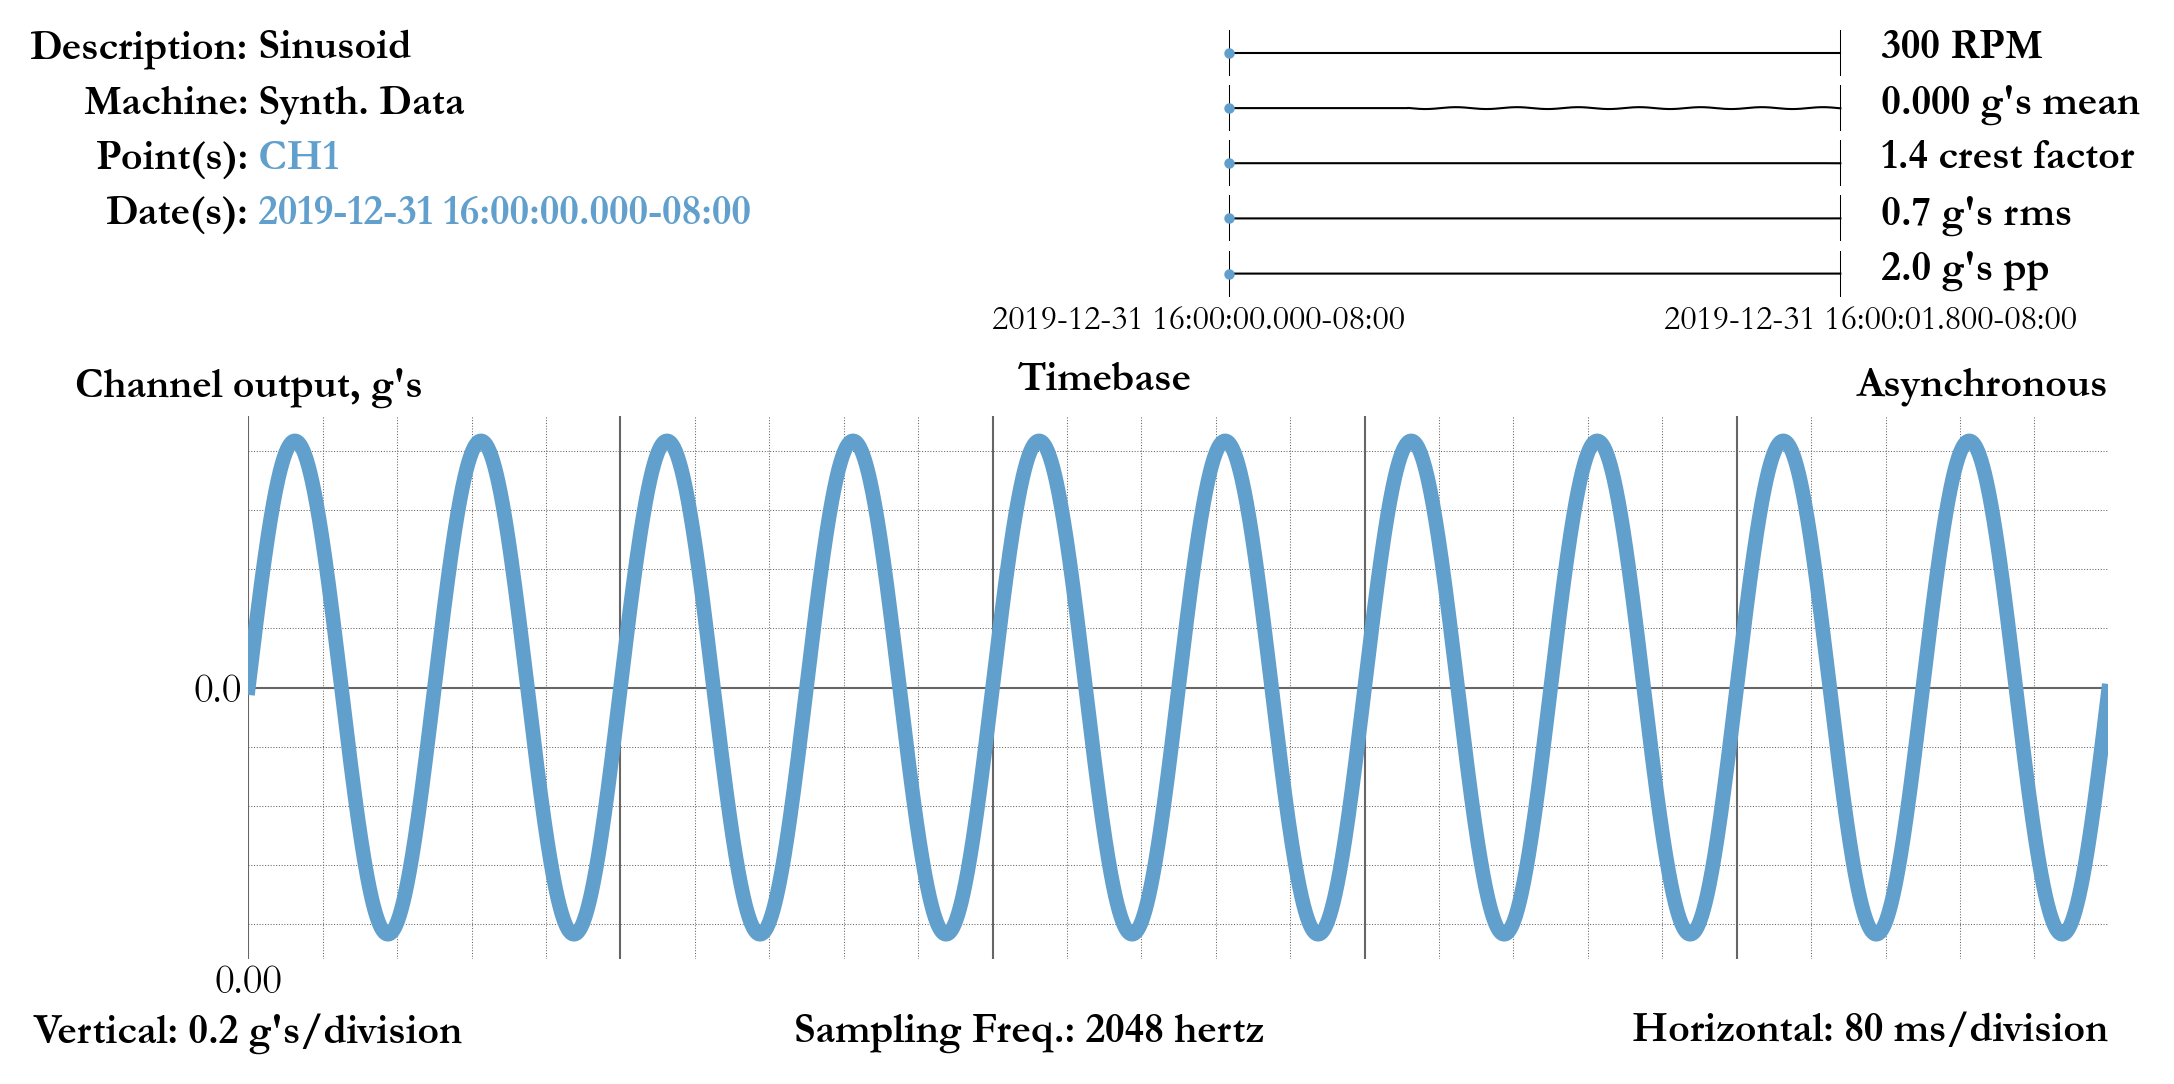

In [52]:
plt.rcParams['figure.figsize'] = [8, 4.5]
lst_sig_even = ClSigEven.plt_sigs()
lst_sig_even.savefig('HelloWorld_Sinusoid.pdf')

#### Single-sided spectrum

The vibration analysis package include single-sided spectrum presentation. This format has value in many vibration applications because the sensors produce real-valued signals.

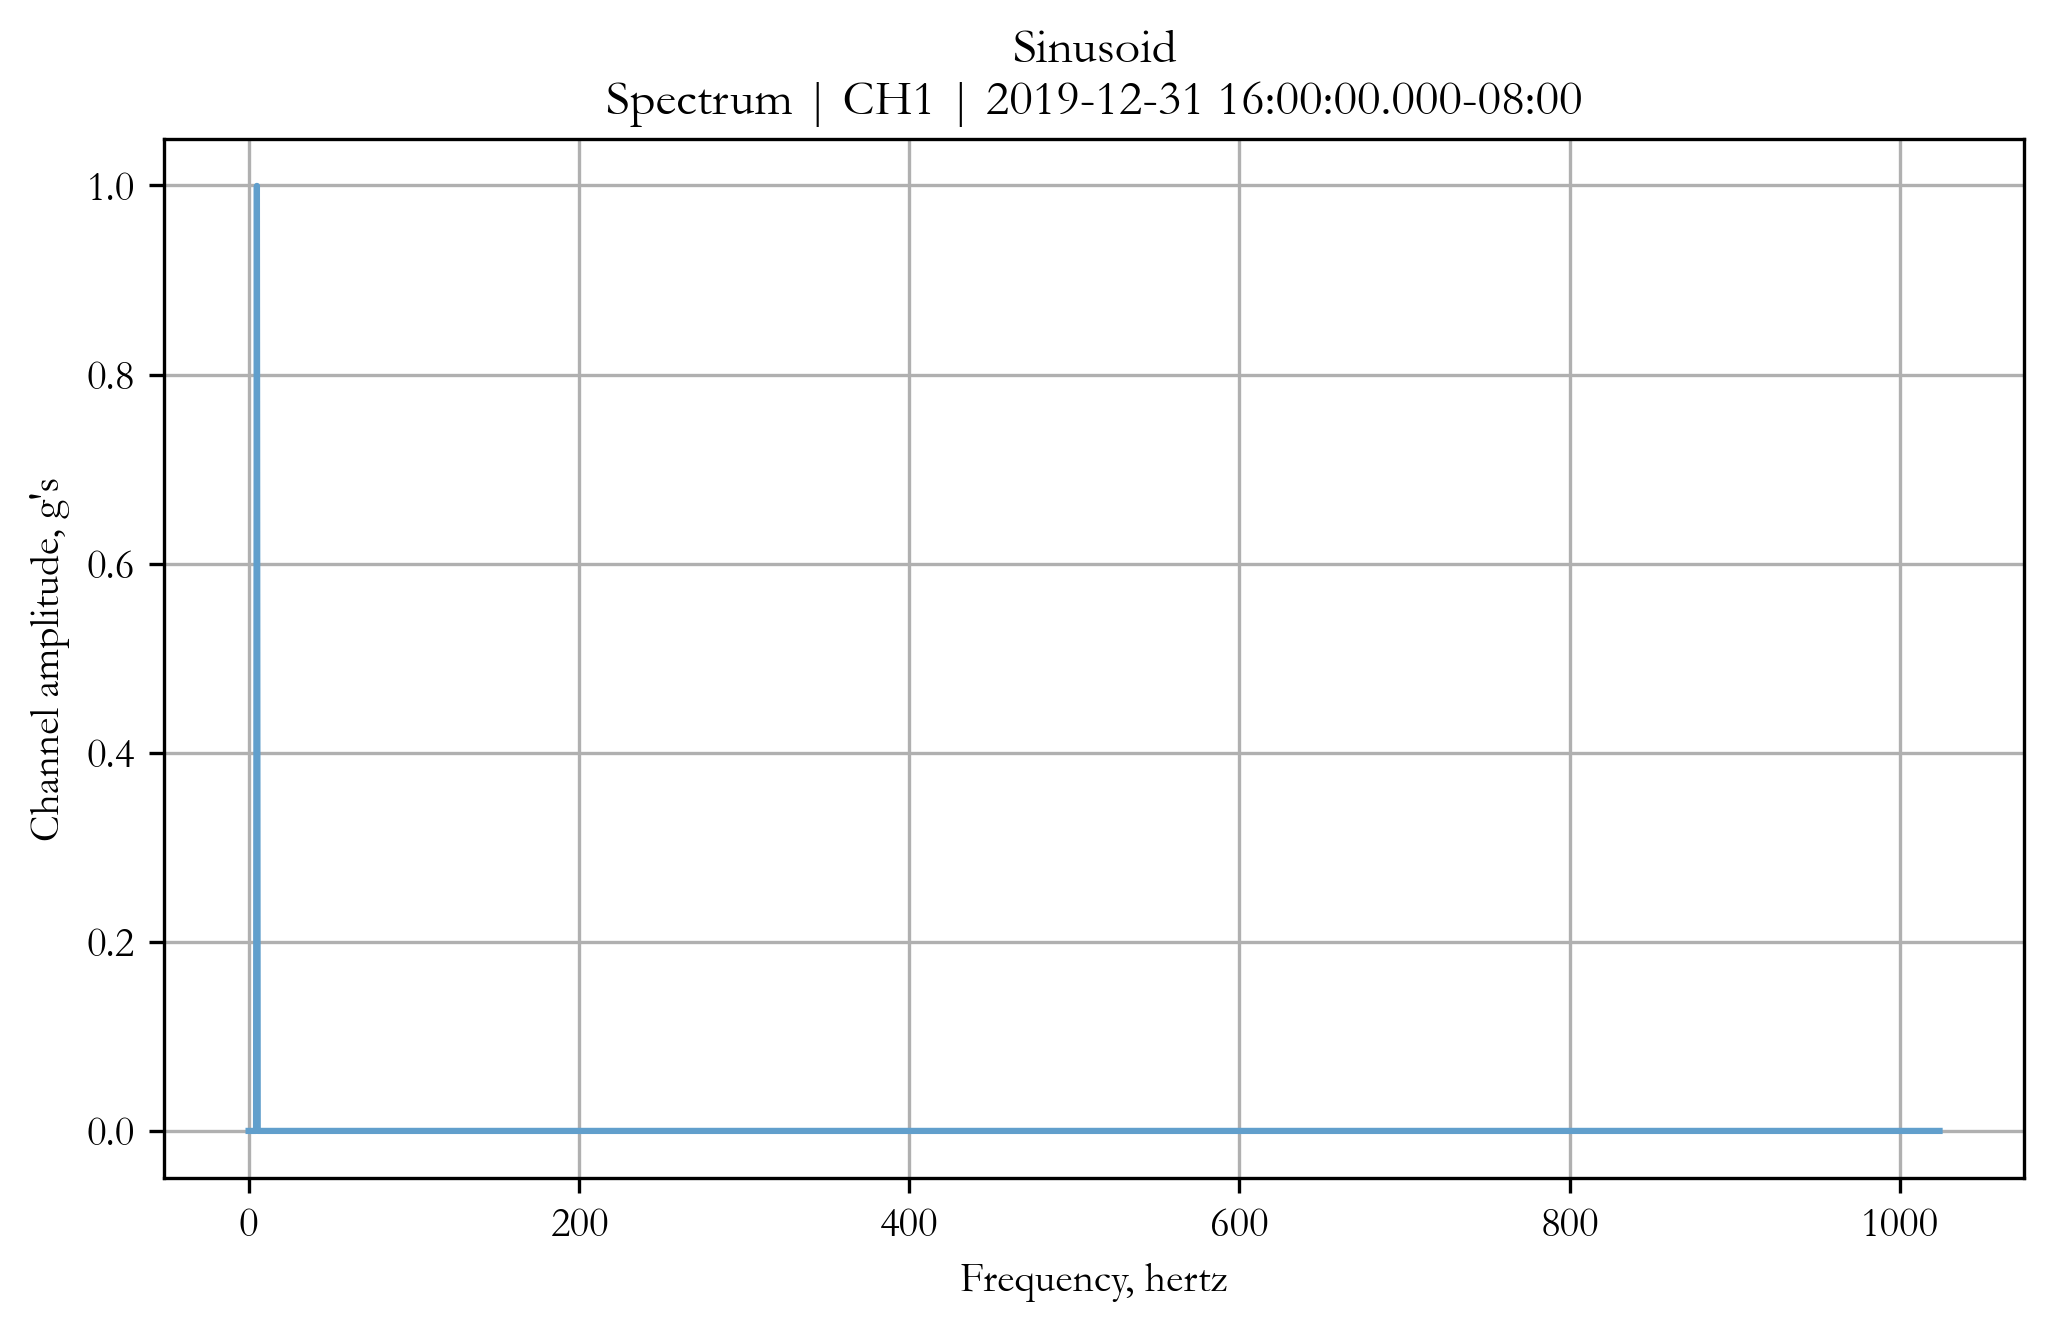

In [47]:
lst_spec_even = ClSigEven.plt_spec()